In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import sklearn.datasets

In [2]:
X,y=sklearn.datasets.make_moons(200,noise =0.15)

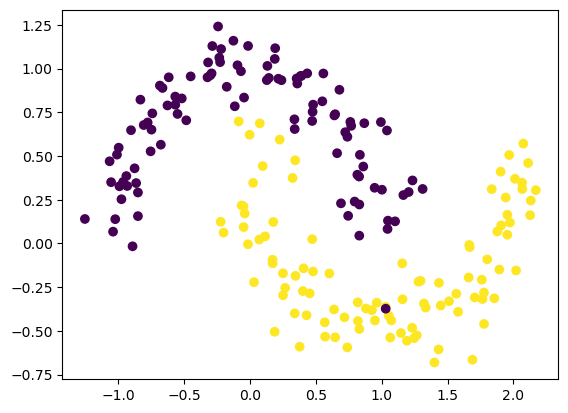

In [96]:
plt.scatter(X[:,0],X[:,1], c=y)

In [97]:
X.shape

(200, 2)

In [98]:
input_neurons = 2
output_neurons = 2
samples = X.shape[0]
learning_rate = 0.001
lambda_reg = 0.01

In [99]:
def retreive(model_dict):
    W1 = model_dict['W1']
    b1 = model_dict['b1']
    W2 = model_dict['W2']
    b2 = model_dict['b2']
    return W1, b1, W2, b2

In [100]:
def forward(x, model_dict):
    W1, b1, W2, b2 = retreive(model_dict)
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    softmax = exp_scores / np.sum(exp_scores, axis = 1, keepdims = True) 
    return z1, a1, softmax

In [101]:
def loss(softmax, y, model_dict):
    W1, b1, W2, b2 = retreive(model_dict)
    m = np.zeros(200)
    for i,correct_index in enumerate(y):
        predicted = softmax[i][correct_index]
        m[i] = predicted
    log_prob = -np.log(m)
    loss = np.sum(log_prob)
    reg_loss = lambda_reg / 2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    loss+= reg_loss
    return float(loss / y.shape[0])

In [102]:
def predict(model_dict, x):
    W1, b1, W2, b2 = retreive(model_dict)
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    softmax = exp_scores / np.sum(exp_scores, axis = 1, keepdims = True)   # (200,2)
    return np.argmax(softmax, axis = 1)    # (200,)

In [103]:
def backpropagation(x, y, model_dict, epochs):
    for i in range(epochs):
        W1, b1, W2, b2 = retreive(model_dict)
        z1, a1, probs = forward(x, model_dict)    # a1: (200,3), probs: (200,2)
        delta3 = np.copy(probs)
        delta3[range(x.shape[0]), y] -= 1      # (200,2)
        dW2 = (a1.T).dot(delta3)               # (3,2)
        db2 = np.sum(delta3, axis=0, keepdims=True)        # (1,2)
        delta2 = delta3.dot(W2.T) * (1 - np.power(np.tanh(z1), 2))
        dW1 = np.dot(x.T, delta2)
        db1 = np.sum(delta2, axis=0)
        # Add regularization terms
        dW2 += lambda_reg * np.sum(W2)  
        dW1 += lambda_reg * np.sum(W1)  
        # Update Weights: W = W + (-lr*gradient) = W - lr*gradient
        W1 += -learning_rate * dW1
        b1 += -learning_rate * db1
        W2 += -learning_rate * dW2
        b2 += -learning_rate * db2
        # Update the model dictionary
        model_dict = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        # Print the loss every 50 epochs
        if i%50 == 0:
            print("Loss at epoch {} is: {:.3f}".format(i,loss(probs, y, model_dict)))
            
    return model_dict

# INIT Network

In [104]:
def init_network(input_dim,hidden_dim,output_dim):
    model = {}
    # Xavier Initialization
    W1 = np.random.randn(input_dim, hidden_dim) / np.sqrt(input_dim)
    b1 = np.zeros((1,hidden_dim))
    W2 = np.random.randn(hidden_dim,output_dim) / np.sqrt(hidden_dim)
    b2 = np.zeros((1,output_dim))
    model['W1']=W1
    model['b1']=b1    
    model['W2']=W2    
    model['b2']=b2    
    return model

In [105]:
def plot_decision_boundary(pred_func): 
    """
    Code adopted from: https://github.com/dennybritz/nn-from-scratch
    """
    # Set min and max values and give it some padding 
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5 
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5 
    h = 0.01 
    # Generate a grid of points with distance h between them 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) 
    # Predict the function value for the whole gid 
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()]) 
    Z = Z.reshape(xx.shape) 
    # Plot the contour and training examples 
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral) 
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral) 
    plt.title("Decision Boundary for hidden layer size 3")

Loss at epoch 0 is: 0.674
Loss at epoch 50 is: 0.332
Loss at epoch 100 is: 0.303
Loss at epoch 150 is: 0.295
Loss at epoch 200 is: 0.293
Loss at epoch 250 is: 0.291
Loss at epoch 300 is: 0.289
Loss at epoch 350 is: 0.288
Loss at epoch 400 is: 0.287
Loss at epoch 450 is: 0.285
Loss at epoch 500 is: 0.284
Loss at epoch 550 is: 0.283
Loss at epoch 600 is: 0.281
Loss at epoch 650 is: 0.280
Loss at epoch 700 is: 0.279
Loss at epoch 750 is: 0.278
Loss at epoch 800 is: 0.276
Loss at epoch 850 is: 0.275
Loss at epoch 900 is: 0.274
Loss at epoch 950 is: 0.273
Loss at epoch 1000 is: 0.272
Loss at epoch 1050 is: 0.271
Loss at epoch 1100 is: 0.270
Loss at epoch 1150 is: 0.270
Loss at epoch 1200 is: 0.269
Loss at epoch 1250 is: 0.268
Loss at epoch 1300 is: 0.268
Loss at epoch 1350 is: 0.267
Loss at epoch 1400 is: 0.267
Loss at epoch 1450 is: 0.266


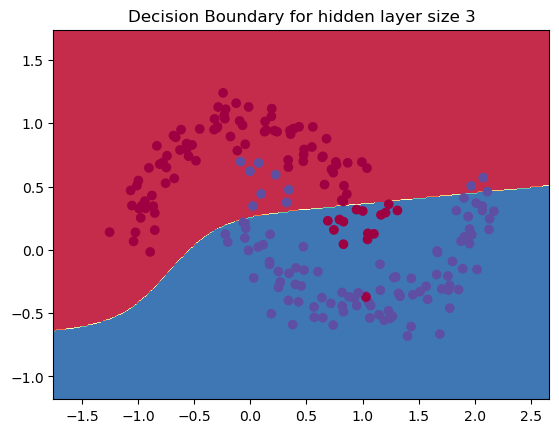

In [106]:
model_dict=init_network(input_dim= input_neurons, hidden_dim=3, output_dim = output_neurons)
model=backpropogation(X,y,model_dict,1500)
plot_decision_boundary(lambda x: predict(model, x))